# Problem 1 - Taylor Approximation
Consider the univariate function
```math
f(x) = x^2 + log x
```
Suppose we want to approximate the function values in the vicinity of x = 1 using Taylor polynomials. Lets call the linear approximation function (linear Taylor polynomial) as L(x) and the quadratic approximation function (quadratic Taylor polynomial) as Q(x):<br>
1. Plot f(x), L(x) and Q(x) in the interval [0, 2] in the same graph.
2. Let the error associated with the linear approximation be given by eL(x) = f(x) − L(x), and the error associated with the quadratic approximation be given by eQ(x) = f(x)−Q(x). Plot eL(x)/x−1 and eQ(x)/((x−1)^2) in the interval [0, 2] in the same graph.
## Part 1 Solution
```
f(x) = x^2 + log(x)
```
L(x) = f(x0) + f'(x0)(x-x0)<br>
<br>
Since,  f'(x) = 2x + 1/x<br>
        f'(1) = 2 + 1 = 3<br>
        <br>
and,    x0 = 1<br>
        f(1) = 1^2 + log(1) <br>
        f(1) = 1 + 0 = 1<br>
        <br>
Therefore,  L(x) = 1 + 3(x-1)<br>
            L(x) = 3x - 2
            
```
L(x) = 3x - 2
```
Q(x) = f(x0) + f'(x0)(x-x0) + (f''(x0)((x-x0)^2))/2<br>
<br>
Since,  f''(x) = 2 + (-1/x^2)<br>
        f''(1) = 2 - 1 = 1<br>
        <br>
Therefore,  Q(x) = 1 + 3(x-1) + ((x-1)^2)/2<br>
            Q(x) = 3x - 2 + (x-1)^2/2<br>
            Q(x) = 3x - 2 + (x^2 - 2x + 1)/2<br>
            Q(x) = 3x - 2 + (x^2 - 2x + 1)/2<br>
            Q(x) = 3x - 2 + x^2/2 - x + 1/2<br>
            Q(x) = x^2/2 + 2x - 3/2<br>
            
```
Q(x) = x^2/2 + 2x - 3/2
```

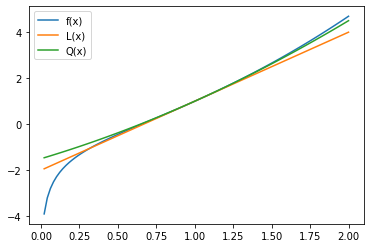

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + np.log(x)

def L(x):
    return 3*x - 2

def Q(x):
    return x**2/2 + 2*x - 3/2

x = np.linspace(0, 2, 100)
while 0 in x:
    x = np.delete(x, np.where(x == 0)) # remove 0 from x because log(0) is undefined

plt.plot(x, f(x), label='f(x)')
plt.plot(x, L(x), label='L(x)')
plt.plot(x, Q(x), label='Q(x)')
plt.legend()
plt.show()

## Part 2 Solution
```
eL(x) = f(x) − L(x)
and
eQ(x) = f(x) − Q(x)
```
To plot,    
```
eL(x)/(x-1)
and
eQ(x)/(x-1)^2
```

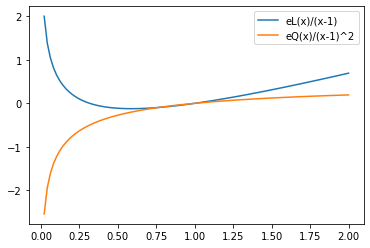

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + np.log(x)

def L(x):
    return 3*x - 2

def Q(x):
    return x**2/2 + 2*x - 3/2

def eL(x):
    return f(x) - L(x)

def eQ(x):
    return f(x) - Q(x)

x = np.linspace(0, 2, 100)
while 0 in x:
    x = np.delete(x, np.where(x == 0)) # delete 0 from x because log(0) is undefined
while 1 in x:
    x = np.delete(x, np.where(x == 1)) # delete 1 from x because denominator will be 0 for eL and eQ

eL = eL(x) / (x-1)
eQ = eQ(x) / (x-1)**2

plt.plot(x, eL, label='eL(x)/(x-1)')
plt.plot(x, eQ, label='eQ(x)/(x-1)^2')
plt.legend()
plt.show()

# Problem 2 - Combinational Descend Method
Write a code to compute the unconstrained minimum of the following optimization problem by implementing a combination descent algorithm with initial point(1, 1).
```math
f(x, y) = (x^2 − 3y^2)^2 + (sin(x^2 + y^2))^2
```
### Algorithm: Line Search Subroutine
Input: 
- x: point in the domain of f 
- d: descent direction for f at x 
- β: reduction factor (0 < β < 1) 
- α: acceptable descent parameter (0 < α < 0.5)

Output: 
- t: stepsize 

Algorithm: 
```python
t := 1
while f(x) − f(x + td) < α * Df(x)(td):
    t := β * t<br>
return t as the stepsize
```
### Algorithm: Combinational Descend Method
Input: 
- x: initial point in the domain of f 
- η: tolerance level for stopping criterion

Output: 
- x: minimum point 

Algorithm: 
```python
while norm(∇f(x)) > η:
    if Hf(x) is positive definite:
        d = [Hf(x)]^-1 * (-∇f(x))
    else:
        d = -∇f(x)
    Line search: choose a stepsize t > 0 using the backtracking line search subroutine
    x := x + td
Return x as the minimum.
```




In [91]:
import numpy as np
import numdifftools as nd

def f(var):
    return (var[0]**2 - 3*var[1]**2)**2 + (np.sin(var[0]**2 + var[1]**2))**2 # function to be minimized

def lineSearchSubroutine(f, x, d, beta=0.5, alpha=0.5):
    t = 1
    while f(x) - f(x + t * d) < -t*alpha*np.dot(nd.Gradient(f)(x), d): # line search subroutine to find the step size
        t = beta*t
    return t

def combinationDescent(f, x, tolerance):
    gradient = nd.Gradient(f)(x) # gradient of the function
    while np.linalg.norm(gradient) > tolerance: # checking if norm of gradient is less than or equal to tolerance
        hessian = nd.Hessian(f)(x) # hessian of the function
        evals , evecs = np.linalg.eig(hessian) # eigen values and eigen vectors of the hessian
        test_evals = np.all(evals > 0) # checking if all eigen values are positive
        if test_evals:
            d = -np.linalg.inv(hessian)@gradient # if all eigen values are positive then matrix multiplication of inverse of hessian and gradient
        else :
            d = -gradient # if all eigen values are not positive then d is equal to negative of gradient
        t = lineSearchSubroutine(f, x, d) # finding the step size
        x = x + t*d
        gradient = nd.Gradient(f)(x) # updating the gradient of the function
    return x

x = np.array([1.0, 1.0])
tolerance = 1e-6
y = combinationDescent(f, x, tolerance)
print(y)
print(f(y))

[1.53499005 0.88622693]
3.5244023582564334e-15


# Problem 3
Given the set S defined as:
$$ S = {x \in \mathbb{R}^2: g_1(x_1,x_2) \ge 0, g_2(x_1,x_2) \ge 0, g_3(x_1,x_2) \ge 0} $$
where:<br>
$g_1(x_1,x_2) = 2x_2 - x_1$<br>
$g_2(x_1,x_2) = 2x_1 - x_2$<br>
$g_3(x_1,x_2) = 1 - x_1 - x_2$<br>
The associated potential function is defined as:
$$ \Psi(x) = -\sum_{j=1}^{m} \log g_j(x) $$
The goal is to find the analytic center of the set S, which is the vector that minimizes the potential function, i.e.,
$$ x_{analytic_center} = \arg\min_{x} \Psi(x) $$
### Solution
$\nabla \Psi(x_1, x_2) =$ $-\Sigma \log(g_i) =$
$-\log(g_1) - \log(g_2) - \log(g_3) =$
$-\log(g_1 \cdot g_2 \cdot g_3) =$
$\log\left(\frac{1}{g_1 \cdot g_2 \cdot g_3}\right)$ <br>
<br>
This will be the new f(x). Beyond this, the process will be exactly the same as the previous problem(2).

In [92]:
import numpy as np
import numdifftools as nd

def g1(x):
    return 2*x[1] - x[0]

def g2(x):
    return 2*x[0] - x[1]

def g3(x):
    return 1 - x[0] - x[1]

def f(x):
    return np.log(1/(g1(x)*g2(x)*g3(x)))

def lineSearchSubroutine(f, x, d, beta=0.5, alpha=0.5):
    t = 1
    while f(x) - f(x + t * d) < -t*alpha*np.dot(nd.Gradient(f)(x), d): # line search subroutine to find the step size
        t = beta*t
    return t

def combinationDescent(f, x, tolerance):
    gradient = nd.Gradient(f)(x) # gradient of the function
    while np.linalg.norm(gradient) > tolerance: # checking if norm of gradient is less than or equal to tolerance
        hessian = nd.Hessian(f)(x) # hessian of the function
        evals , evecs = np.linalg.eig(hessian) # eigen values and eigen vectors of the hessian
        test_evals = np.all(evals > 0) # checking if all eigen values are positive
        if test_evals:
            d = -np.linalg.inv(hessian)@gradient # if all eigen values are positive then matrix multiplication of inverse of hessian and gradient
        else :
            d = -gradient # if all eigen values are not positive then d is equal to negative of gradient
        t = lineSearchSubroutine(f, x, d) # finding the step size
        x = x + t*d
        gradient = nd.Gradient(f)(x) # updating the gradient of the function
    return x

x = np.array([0.25, 0.25])
tolerance = 1e-6 # tolerance value
print(combinationDescent(f, x, tolerance))
print(f(combinationDescent(f, x, tolerance)))

[0.33333333 0.33333333]
3.295836866004329
